# Interface for using the BoxCar library with Jupyter notebooks

This interface calls the functions in the numerics_boxcar.py library, to construct the IJ diagrams, as well as building the optimal boxcars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numerics_boxcar import *

The code works by first defining a set $(T_L, T_R, \mu_L, \mu_R)$ and then calling the "Structure" function. This will load some functions that will make the calculation of the boxcars easier.

The last argument to "Structure" is the overall precision desired.

In [7]:
bl = 1/1.0
br = 1/0.2
ml = 0.1
mr = 0.6
S = Structure(br, bl, mr, ml, 10**(-7)) 

#### I,J plane
The boundaries in the IJ plane (e.g. Fig. 2(a)) can now be obtained as

In [3]:
boundary = S.get_IJ_extreme(10**-4)

Output is a list, with entries 0,1,2 being $I, J, \Delta_I^2$ in one boundary, and 3,4,5 being $I,J,\Delta_I^2$ in the other. 

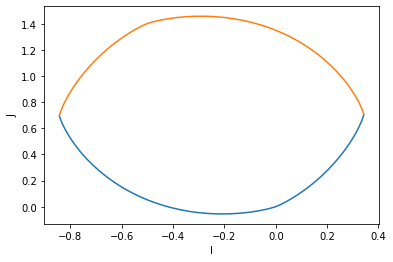

In [10]:
plt.plot(boundary[0], boundary[1])
plt.plot(boundary[3], boundary[4])
plt.xlabel('I')
plt.ylabel('J')
plt.show()

### Finding the boxcar
For a given $(T_L, T_R, \mu_L, \mu_R)$, given any $I,J$ within the boundaries above, we can now compute the associated optimal boxcar.

This is done by calling S.boxcar_sol(I,J,tol), where tol is the overall precision. 

The output is the values of $\lambda$, $\eta$ [Eq. (5) of th emain text] and the boxcar list.

In [12]:
I = -0.2
J = 0.8
lam, eta, box = S.boxcar_solve(I, J, 10**-3)
print(lam,eta)
print(box)

0.42879877568210967 -0.29468236696305505
[(-18.804223285290295, -1.1144247572582886), (2.8845273062918455, 19.004223285290298)]


We can make a plot of the boxcar using the following snippet of code:

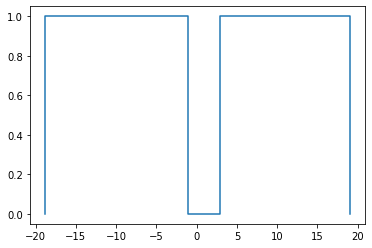

In [15]:
xbox = np.array([S.region[0]] + [box[i//4][(i%4)//2] for i in range(4*len(box))] + [S.region[1]])
ybox = np.array([0]+([0., 1., 1., 0.]*len(box)) + [0])
plt.plot(xbox, ybox)
plt.show()